In [1]:
# import system libs
import os
import itertools
from PIL import Image

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

print ('modules loaded')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


modules loaded


In [2]:
# Generate data paths with labels
train_data_dir = '/kaggle/input/malayakew-plant-leaf-dataset/MK/D1/train'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# print(labels)
        
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)

In [3]:
train_df

,filepaths,labels
0,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (15)
1,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (15)
2,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (15)
3,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (15)
4,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (15)
...,...,...
2283,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (34)
2284,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (34)
2285,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (34)
2286,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (34)


In [4]:
# Generate data paths with labels
test_data_dir = '/kaggle/input/malayakew-plant-leaf-dataset/MK/D1/test'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [5]:
ts_df

,filepaths,labels
0,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (15)
1,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (15)
2,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (15)
3,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (15)
4,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (15)
...,...,...
523,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (34)
524,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (34)
525,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (34)
526,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (34)


In [6]:
# valid and test dataframe
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [7]:
test_df

,filepaths,labels
11,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (15)
435,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (4)
414,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (32)
150,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (10)
474,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (11)
...,...,...
453,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (21)
437,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (4)
427,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (24)
477,/kaggle/input/malayakew-plant-leaf-dataset/MK/...,Class (11)


In [8]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 2288 validated image filenames belonging to 44 classes.
Found 264 validated image filenames belonging to 44 classes.
Found 264 validated image filenames belonging to 44 classes.


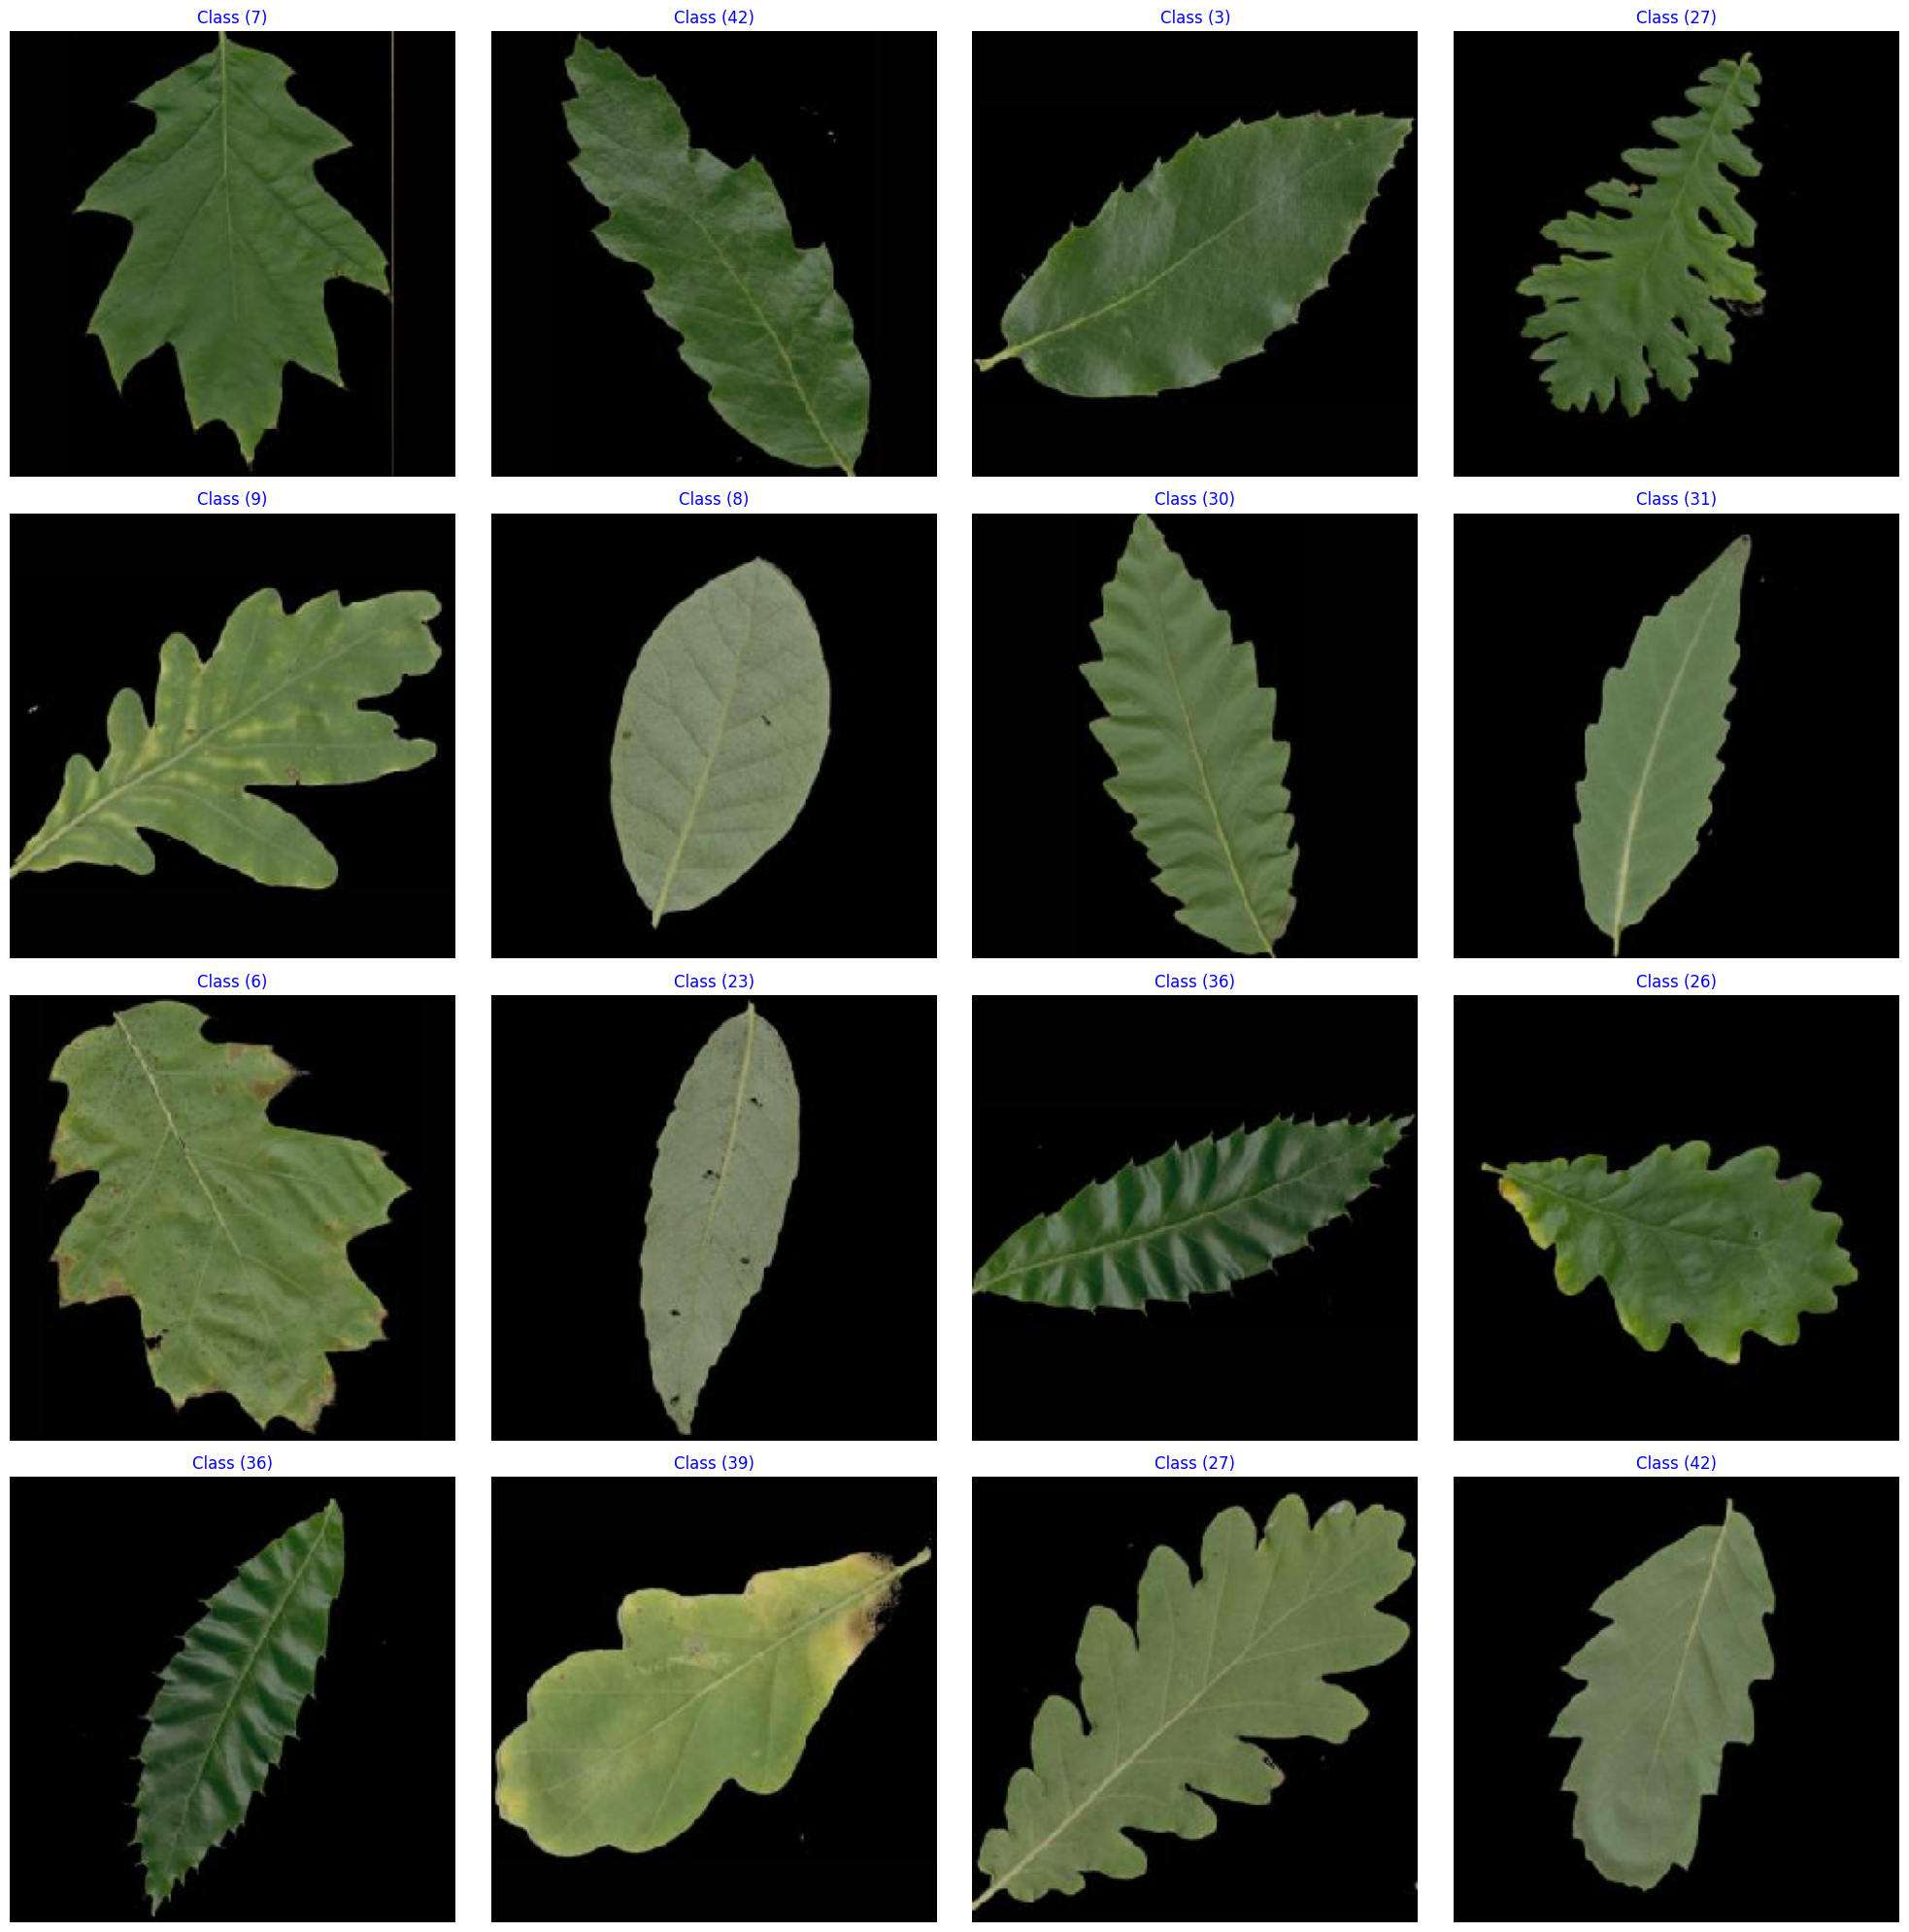

In [9]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [15]:
epochs = 10   # number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= train_gen, shuffle= False)

Epoch 1/10
143/143 [==============================] - 20s 143ms/step - loss: 0.8431 - accuracy: 0.7312 - val_loss: 0.7185 - val_accuracy: 0.7670
Epoch 2/10
143/143 [==============================] - 20s 143ms/step - loss: 0.6585 - accuracy: 0.7937 - val_loss: 0.4087 - val_accuracy: 0.8903
Epoch 3/10
143/143 [==============================] - 20s 142ms/step - loss: 0.4548 - accuracy: 0.8558 - val_loss: 0.2595 - val_accuracy: 0.9183
Epoch 4/10
143/143 [==============================] - 20s 143ms/step - loss: 0.3951 - accuracy: 0.8728 - val_loss: 0.2678 - val_accuracy: 0.9117
Epoch 5/10
143/143 [==============================] - 20s 143ms/step - loss: 0.3068 - accuracy: 0.9008 - val_loss: 0.2296 - val_accuracy: 0.9266
Epoch 6/10
143/143 [==============================] - 20s 143ms/step - loss: 0.2391 - accuracy: 0.9235 - val_loss: 0.1534 - val_accuracy: 0.9594
Epoch 7/10
143/143 [==============================] - 20s 142ms/step - loss: 0.1909 - accuracy: 0.9436 - val_loss: 0.1602 - val_ac

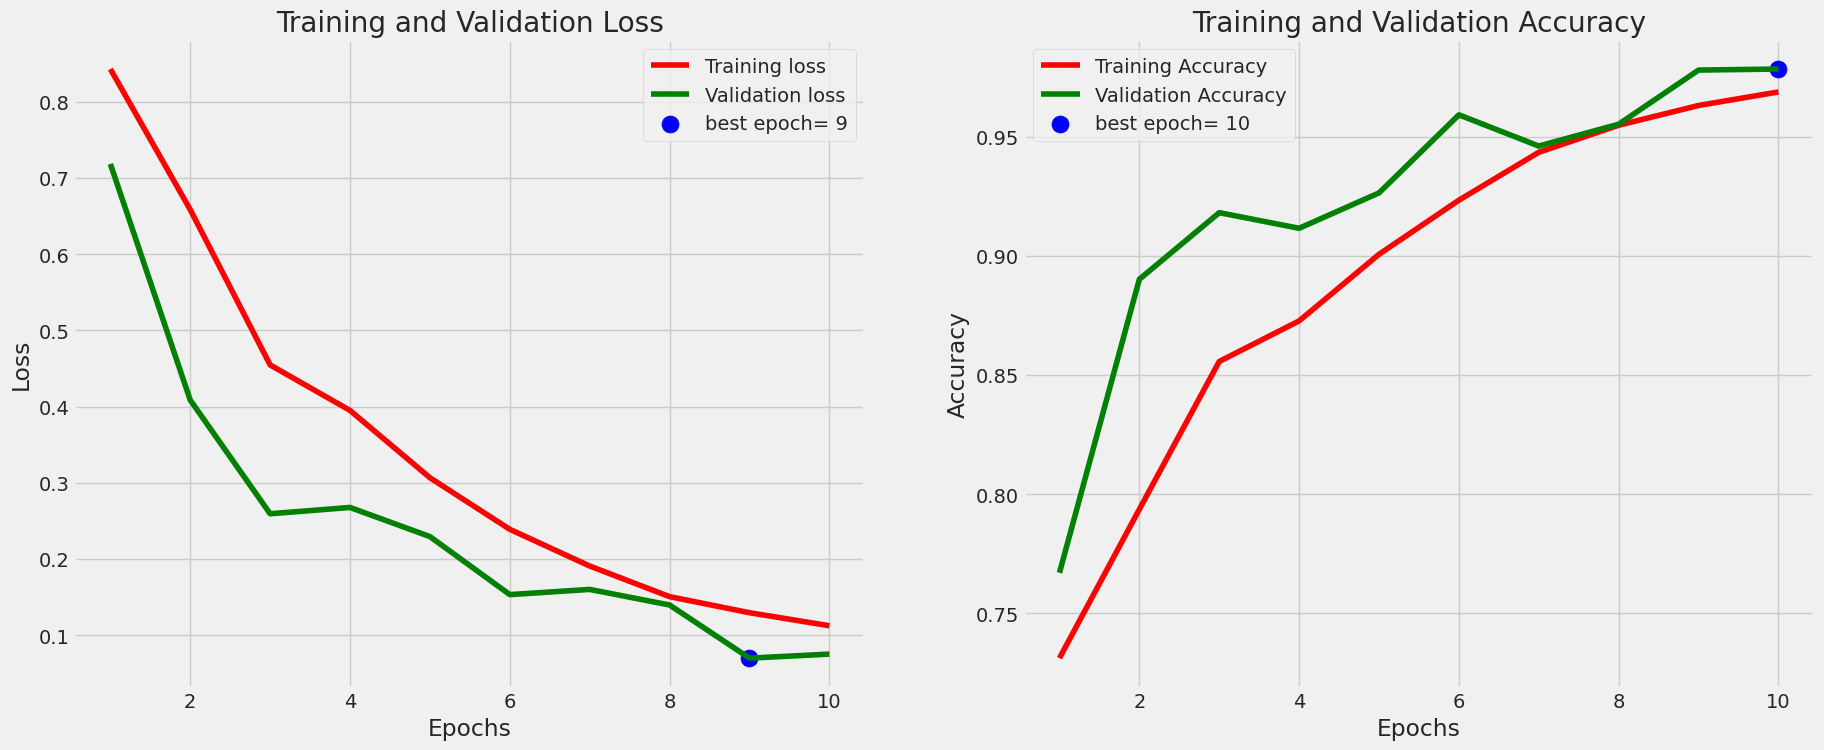

In [16]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [17]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

17/17 [==============================] - 1s 40ms/step - loss: 12.3545 - accuracy: 0.3788
Train Loss:  0.07535786926746368
Train Accuracy:  0.9785839319229126
--------------------
Validation Loss:  12.496898651123047
Validation Accuracy:  0.3863636255264282
--------------------
Test Loss:  12.354474067687988
Test Accuracy:  0.3787878751754761


In [18]:
preds = model.predict_generator(test_gen)    
y_pred = np.argmax(preds, axis=1)            

/tmp/ipykernel_42/10869150.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


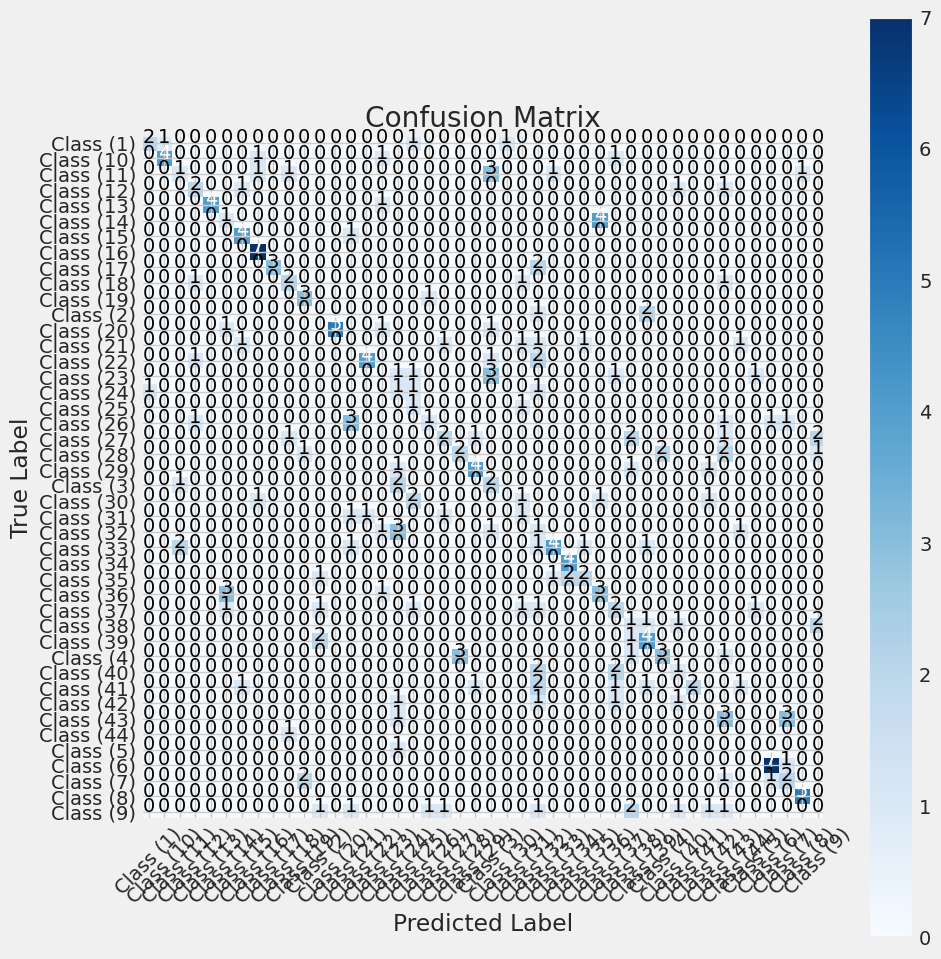

In [19]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()